### Imports

In [38]:
# Pour l'analyse et la visualisation des données

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import sklearn

# Pour la regression logistique
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

### Lecture du csv

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

### Echantillon de données

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Nous avons 12 variables et 70,000 observations dans le dataset. Nos variables sont uniquement quantitatives dont plusieurs variables binaires (1 ou 0).

### Données manquantes

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Il n'y a pas de données manquantes dans le dataset. 

### Données en doublons

In [6]:
df.duplicated().sum()

0

Il n'y a pas de doublons dans le dataset. 

### Données aberrantes

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


On peut remarquer qu'il y a des données aberrantes notamment au niveau de la taille (max de 250 cm), le poids et systolic et diastolic blood pressure (ap_hi & ap_lo). Il y a des valeurs négatives ainsi que des très grandes valeurs dans les colonnes de pression artérielle ainsi que des valeurs aberrantes dans les colonnes de taille et poids. Il faut analyser le dataset afin d'identifier s'il y a des enfants ce qui expliquerai ces chiffres bas pour la taille et le poids. Si on ne retrouve pas d'enfant dans le dataset il faudra alors supprimer les lignes ou il y a des données aberrantes afin d'avoir un dataset plus équilibré. 

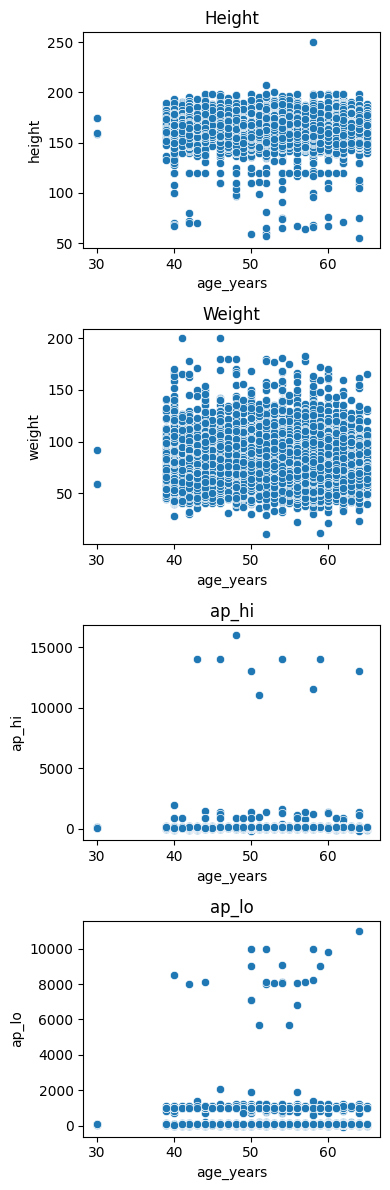

In [8]:
df['age_years'] = (df['age'] / 365).round().astype('int')

fig, axs = plt.subplots(4, 1, figsize=(4, 12))

sns.scatterplot(x='age_years', y='height', data=df, ax=axs[0])
axs[0].set_title('Height')

sns.scatterplot(x='age_years', y='weight', data=df, ax=axs[1])
axs[1].set_title('Weight')

sns.scatterplot(x='age_years', y='ap_hi', data=df, ax=axs[2])
axs[2].set_title('ap_hi')

sns.scatterplot(x='age_years', y='ap_lo', data=df, ax=axs[3])
axs[3].set_title('ap_lo')

plt.tight_layout()
plt.show()

Comme on peut le voir dans ces 4 graphiques il y a des valeurs aberrantes pour la taille ; une valeur à 250 cm et plusieurs valeurs en dessous de 125cm alors que l'age minimum de ce dataset est de un peu moins de 30 ans. On a le meme cas pour le poids ou il y a de nombreuses valeurs à environ 25kg ce qui n'est pas possible pour un adulte de 25 ans+. On peut donc considérer ces valeurs comme aberrantes et elles devront etre enlevée du dataset. 

On retrouve le meme cas pour la pression artérielle avec des valeurs largement au dessus des autres à 6,000+ pour l'ap_lo et 10,000+ pour l'ap_hi.

En sachant que la pression artérielle varie autour de 120 pour ap_hi et 80 pour ap_lo. Or, ici nous avons des valeurs beaucoup trop grandes. Nous allons donc également supprimer ces valeurs. 

### Transformation des données

In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


Nous transformons dans un premier temps la colonne age qui est exprimée en jours afin de l'exprimer en années. Cette nouvelle colonne s'apelle age_years. C'est une colonne que nous avons utilisé dans le graphique précédent afin d'identifier les valeurs aberrantes c'est pour cela qu'elle a été crée lors de l'étape précédente.

In [10]:
df = df[(df['height'] >= df['height'].quantile(0.0025)) & (df['height'] <= df['height'].quantile(0.995))]
df = df[(df['weight'] >= df['weight'].quantile(0.0025)) & (df['weight'] <= df['weight'].quantile(0.995))]
df = df[(df['ap_hi'] >= df['ap_hi'].quantile(0.0025)) & (df['ap_hi'] <= df['ap_hi'].quantile(0.995))]
df = df[(df['ap_lo'] >= df['ap_lo'].quantile(0.0025)) & (df['ap_lo'] <= df['ap_lo'].quantile(0.995))]
df = df[df['ap_lo'] <= df['ap_hi']]
df.shape

(67415, 14)

In [11]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000
mean,49974.736453,19466.265119,1.347252,164.380049,73.823365,126.384944,81.244115,1.362605,1.224149,0.087176,0.052807,0.803857,0.492976,53.331781
std,28855.753495,2467.149484,0.476100,7.621863,13.446714,15.988716,9.162530,0.677606,0.570144,0.282096,0.223650,0.397081,0.499954,6.764931
min,0.000000,10798.000000,1.000000,140.000000,43.000000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,24988.500000,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50017.000000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74879.500000,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,186.000000,125.000000,188.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Ici j'ai décidé d'utiliser les percentiles pour supprimer les données aberrantes. Nous avons donc gardé les valeurs qui se situent entre 2.5 et 97.5% du dataset. Cela nous a permis de supprimer les valeurs dites 'outlier' qui sortent un peu trop du lot et qui peuvent pousser notre algorithme à la confusion lors de prédiction de données. 

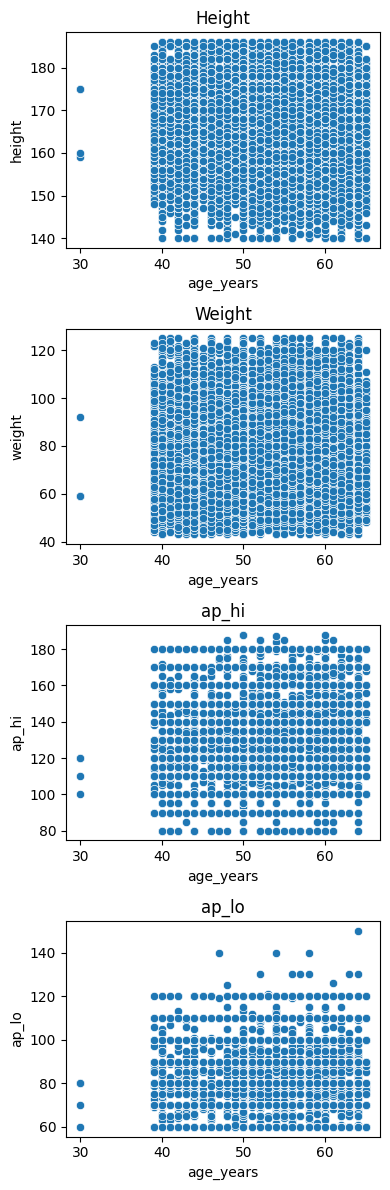

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(4, 12))

sns.scatterplot(x='age_years', y='height', data=df, ax=axs[0])
axs[0].set_title('Height')

sns.scatterplot(x='age_years', y='weight', data=df, ax=axs[1])
axs[1].set_title('Weight')

sns.scatterplot(x='age_years', y='ap_hi', data=df, ax=axs[2])
axs[2].set_title('ap_hi')

sns.scatterplot(x='age_years', y='ap_lo', data=df, ax=axs[3])
axs[3].set_title('ap_lo')

plt.tight_layout()
plt.show()

On remarque qu'il nous reste encore des outlier pour l'age. Nous allons donc supprimer ces valeurs là.

In [13]:
df = df[(df['age_years'] >= df['age_years'].quantile(0.025)) & (df['age_years'] <= df['age_years'].quantile(0.975))]
df.shape

(66684, 14)

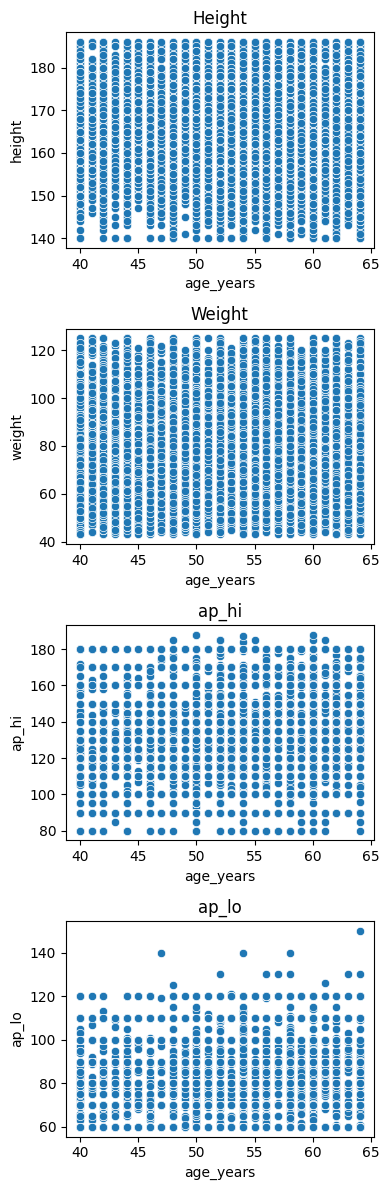

In [14]:
fig, axs = plt.subplots(4, 1, figsize=(4, 12))

sns.scatterplot(x='age_years', y='height', data=df, ax=axs[0])
axs[0].set_title('Height')

sns.scatterplot(x='age_years', y='weight', data=df, ax=axs[1])
axs[1].set_title('Weight')

sns.scatterplot(x='age_years', y='ap_hi', data=df, ax=axs[2])
axs[2].set_title('ap_hi')

sns.scatterplot(x='age_years', y='ap_lo', data=df, ax=axs[3])
axs[3].set_title('ap_lo')

plt.tight_layout()
plt.show()

Nous avons donc maintenant un dataset sans outlier que nous pouvons analyser et ensuite exploiter avec notre algorithme.

Le dataset est passé de 70,000 observations à 66,684.


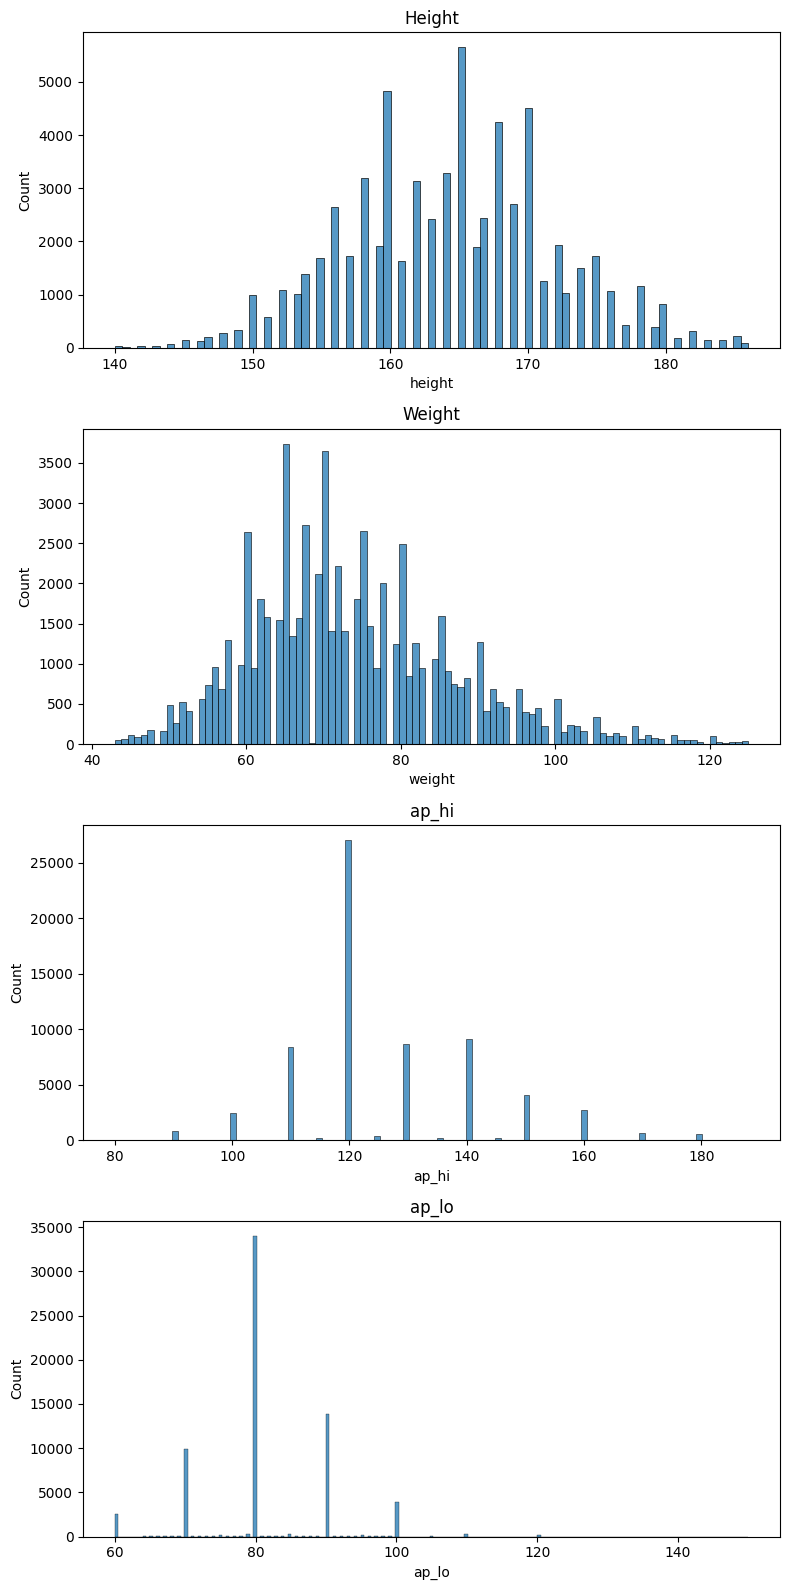

In [15]:
fig, axs = plt.subplots(4, 1, figsize=(8, 16))  

sns.histplot(df['height'], ax=axs[0])
axs[0].set_title('Height')

sns.histplot(df['weight'], ax=axs[1])
axs[1].set_title('Weight')

sns.histplot(df['ap_hi'], ax=axs[2])
axs[2].set_title('ap_hi')

sns.histplot(df['ap_lo'], ax=axs[3])
axs[3].set_title('ap_lo')

plt.tight_layout()
plt.show()

On peut observer à l'aide de ces histogrammes que nous avons des diagrammes qui ont plus ou moins une forme de cloche. Ces données ont donc une distribution plus ou moins symétrique.

In [16]:
df.drop('id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)

Nous supprimons la colonne id car elle ne nous est d'aucune utilité. Idem pour la colonne de l'age qui nous donne l'age en jours, nous exploiterons la nouvelle colonne 'age_years' qui nous donne l'age en années.

In [17]:
# save the cleaned data in new csv file
df.to_csv('cardio_train_cleaned.csv', index=False)

Enregistrement du csv comme nouveau fichier pour l'utiliser lors de notre regression logistique.

#### Visualisation

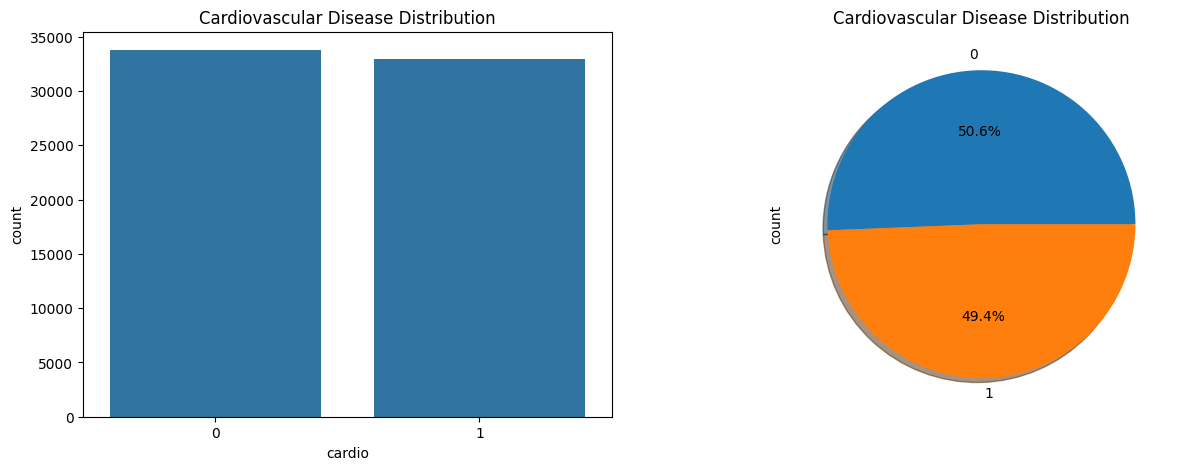

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='cardio', data=df, ax=axs[0])
axs[0].set_title('Cardiovascular Disease Distribution')
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], shadow=True)
axs[1].set_title('Cardiovascular Disease Distribution')
plt.show()

Ici on peut observer que le dataset est réparti de façon égale pour les personnes qui ont eu une maladie cardiovasculaire et ceux qui n'en ont pas eu. 

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


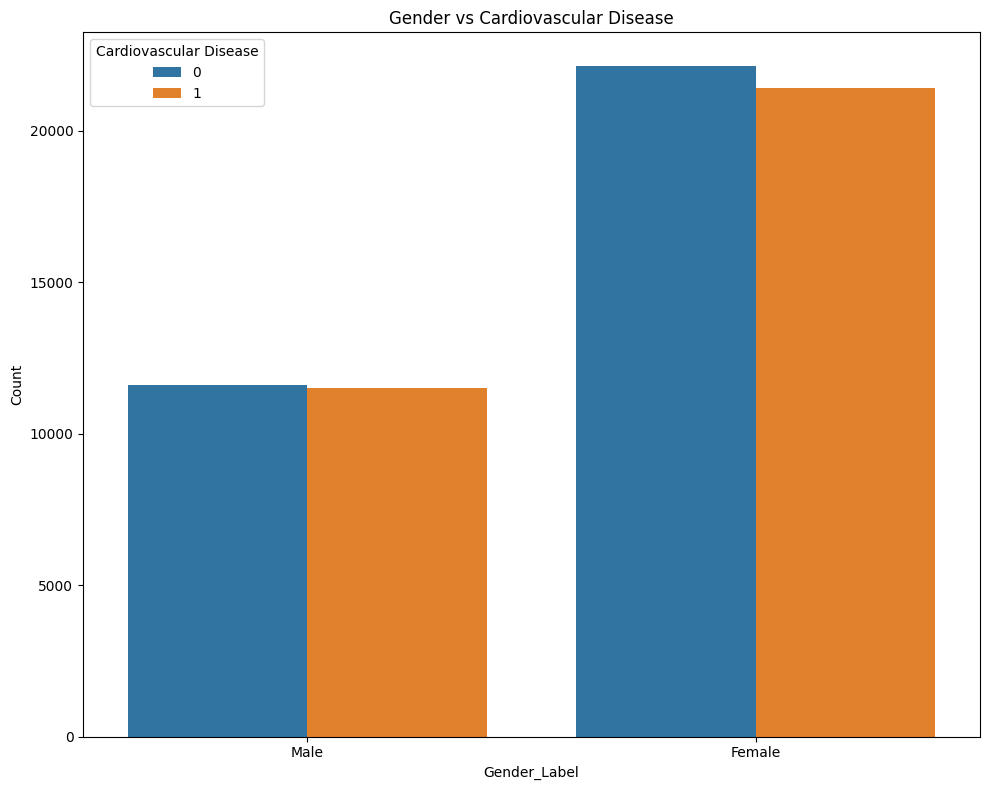

In [19]:
df['Gender_Label'] = df['gender'].map({1: 'Female', 2: 'Male'})

plt.figure(figsize=(10, 8))
sns.countplot(x='Gender_Label', hue='cardio', data=df)
plt.title('Gender vs Cardiovascular Disease')
plt.ylabel('Count')
plt.legend(title='Cardiovascular Disease')
plt.tight_layout()
plt.show()

Lorsqu'on observe les cas de maladie cardiovasculaire entre les femmes et les hommes on voit une répartition égale pour les cas positifs et négatifs parmis les 2 genres. On a donc environ 50% des femmes et des hommes du dataset qui ont eu une maladie cardiovasculaire. 

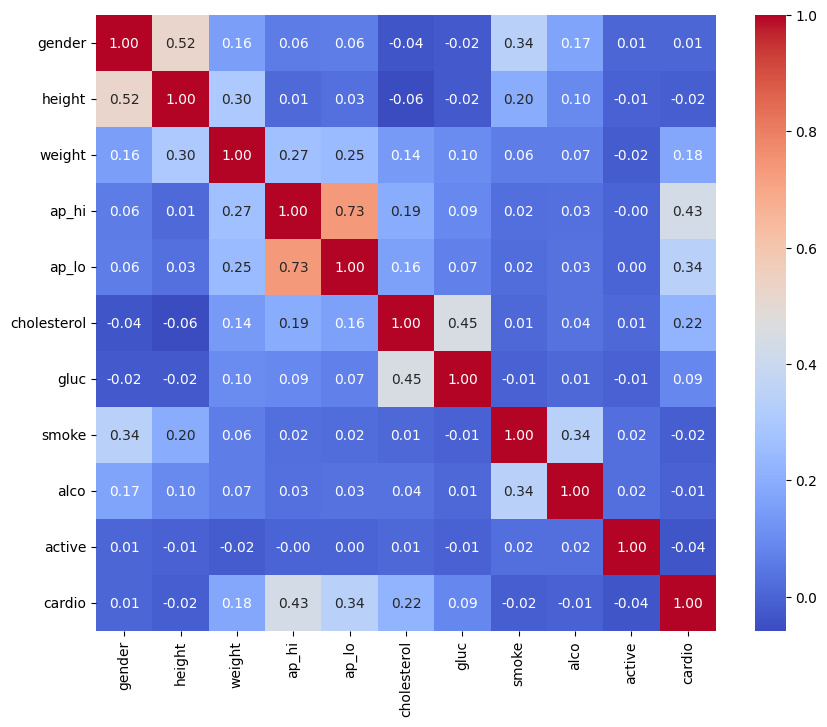

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


On observe dans cette matrice de corrélation qu'il y a une forte corrélation entre les 2 valeurs de pression artérielle ; nous avons une corrélation de 0.73.

Il y a également une forte corrélation entre la taille et le genre ; on a ici une corrélation de 0.52.

Pour les autres variables nous avons plusieurs corrélations qui sont autour de 0.3 / 0.4.

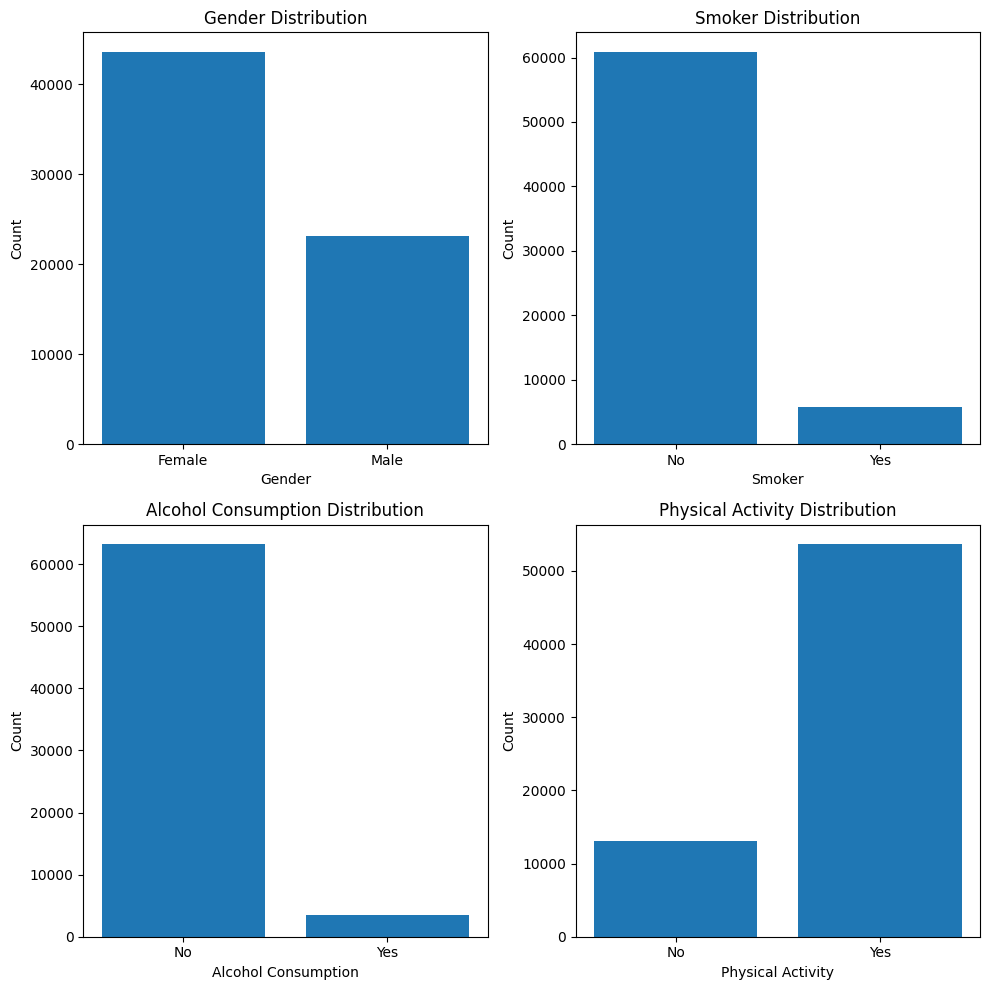

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Distribution des genres
gender_labels = ['Female', 'Male']
gender_values = [df[df['gender'] == 1].shape[0], df[df['gender'] == 2].shape[0]]
axs[0, 0].bar(gender_labels, gender_values)
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')

# Distribution des fumeurs
smoker_labels = ['No', 'Yes']
smoker_values = [df[df['smoke'] == 0].shape[0], df[df['smoke'] == 1].shape[0]]
axs[0, 1].bar(smoker_labels, smoker_values)
axs[0, 1].set_title('Smoker Distribution')
axs[0, 1].set_xlabel('Smoker')
axs[0, 1].set_ylabel('Count')

# Distribution de la consommation d'alcool
alcohol_labels = ['No', 'Yes']
alcohol_values = [df[df['alco'] == 0].shape[0], df[df['alco'] == 1].shape[0]]
axs[1, 0].bar(alcohol_labels, alcohol_values)
axs[1, 0].set_title('Alcohol Consumption Distribution')
axs[1, 0].set_xlabel('Alcohol Consumption')
axs[1, 0].set_ylabel('Count')

# Distribution de l'activité physique
activity_labels = ['No', 'Yes']
activity_values = [df[df['active'] == 0].shape[0], df[df['active'] == 1].shape[0]]
axs[1, 1].bar(activity_labels, activity_values)
axs[1, 1].set_title('Physical Activity Distribution')
axs[1, 1].set_xlabel('Physical Activity')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()



Ici on peut observer la répartition dans le dataset des différentes variables binaires. Cela nous permet d'avoir une meilleure idée de la population avec laquelle nous travaillons.

On remarque qu'il y a :
* Plus de femmes que d'hommes dans le dataset
* Plus de personnes qui ne consomment pas d'alcool
* Plus de personnes qui ne fument pas
* Plus de personnes qui pratiquent une activité physique

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

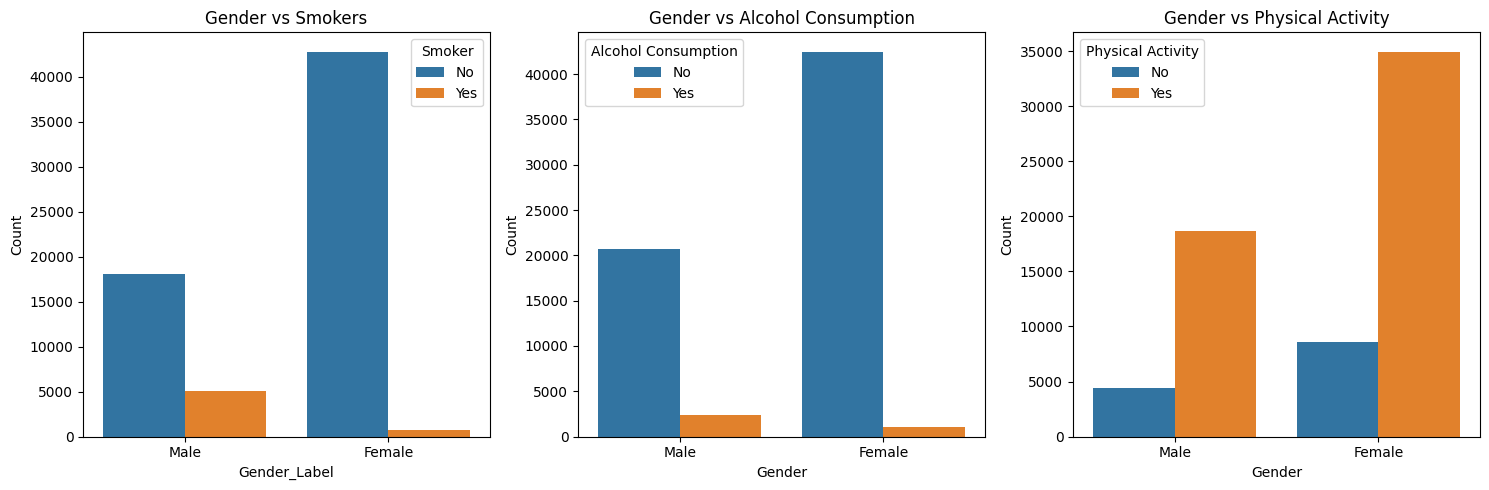

In [22]:
df['Gender_Label'] = df['gender'].map({1: 'Female', 2: 'Male'})

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gender vs Smokers
sns.countplot(x='Gender_Label', hue='smoke', data=df, ax=axs[0])
axs[0].set_title('Gender vs Smokers')
axs[0].set_ylabel('Count')
axs[0].legend(title='Smoker', labels=activity_labels)

# Gender vs Alcohol Consumption
sns.countplot(x='Gender_Label', hue='alco', data=df, ax=axs[1])
axs[1].set_title('Gender vs Alcohol Consumption')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')
axs[1].legend(title='Alcohol Consumption', labels=activity_labels)

# Gender vs Physical Activity
sns.countplot(x='Gender_Label', hue='active', data=df, ax=axs[2])
axs[2].set_title('Gender vs Physical Activity')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Count')
axs[2].legend(title='Physical Activity', labels=activity_labels)

plt.tight_layout()
plt.show()

On observe que il y a plus de fumeurs chez les hommes que les femmes dans ce dataset. C'est également la meme observation pour la consommation d'alcool, malgré un plus grand nombre de femmes dans le dataset il y a plus de consommateur d'alcool chez les hommes. 

Cependant pour l'activité physique on remarque qu'il y a une répartition similaire entre les deux genre.

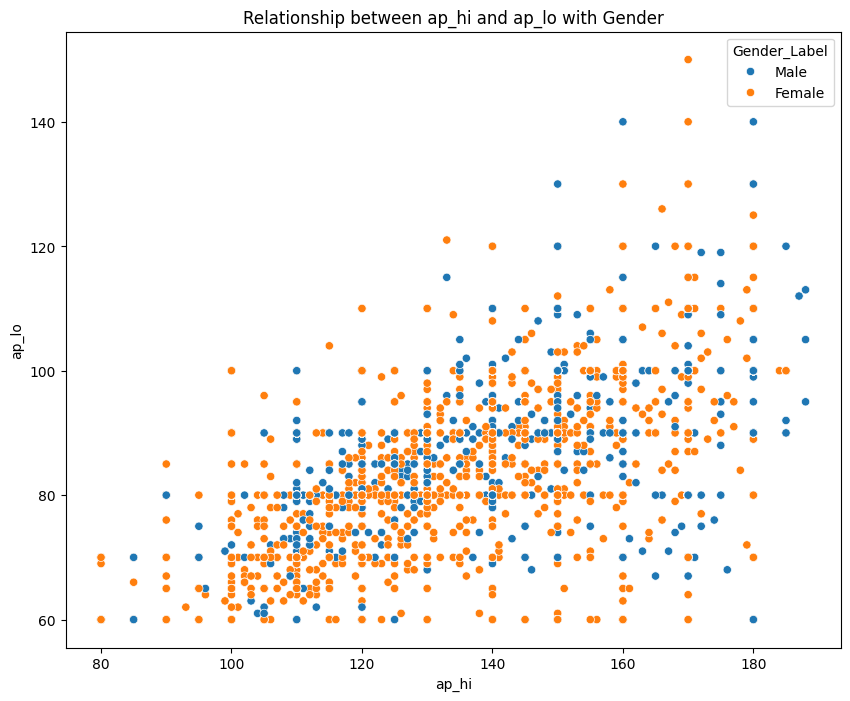

In [23]:
df['Gender_Label'] = df['gender'].map({1: 'Female', 2: 'Male'})

plt.figure(figsize=(10, 8))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='Gender_Label', data=df)
plt.title('Relationship between ap_hi and ap_lo with Gender')
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')

plt.show()


Il n'y a pas de corrélation spécifique entre la pression artérielle et le genre, nous avons une corrélation de 0.065 & 0.06 ce qui représente une corrélation faible. Ici on peut voir la répartition des différentes pressions artérielle en fonction des gennres mais il n'y a pas de corrélation linéaire spécifique comme vu dans la matrice de corrélation linéaire.

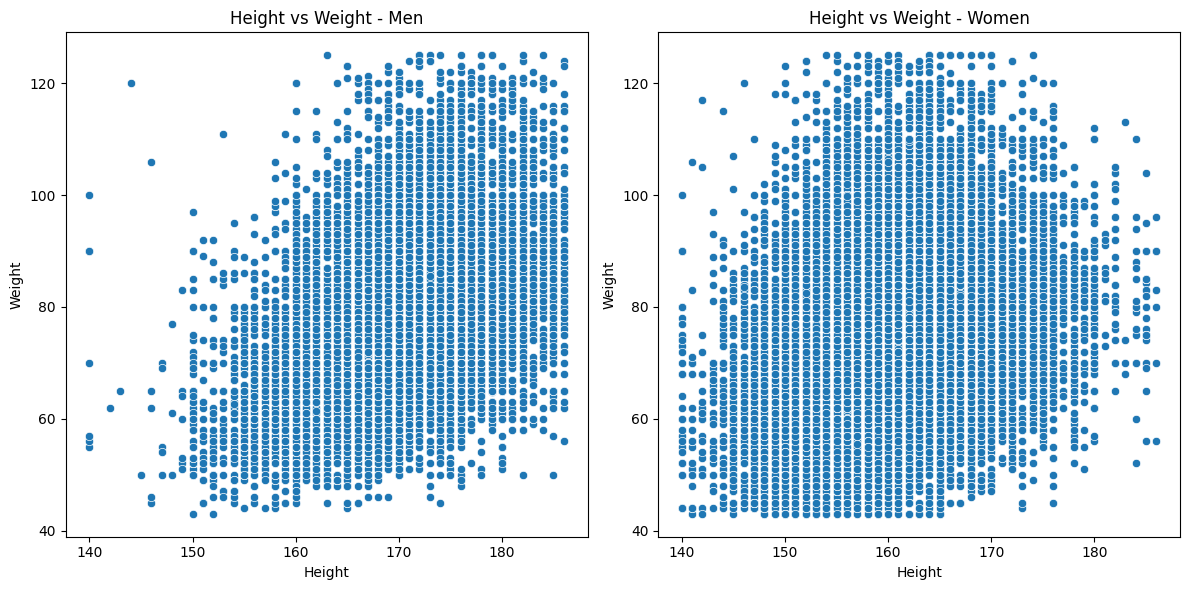

In [24]:
# Create separate dataframes for men and women
df_men = df[df['Gender_Label'] == 'Male']
df_women = df[df['Gender_Label'] == 'Female']

# Create subplots for men and women
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for men
sns.scatterplot(x='height', y='weight', data=df_men, ax=axs[0])
axs[0].set_title('Height vs Weight - Men')
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Weight')

# Scatter plot for women
sns.scatterplot(x='height', y='weight', data=df_women, ax=axs[1])
axs[1].set_title('Height vs Weight - Women')
axs[1].set_xlabel('Height')
axs[1].set_ylabel('Weight')

plt.tight_layout()
plt.show()


Ce qu'on peut observer dans ces deux graphiques c'est qu'il y a plus d'hommes de grande taille que de femmes. On voit l'inverse pour le poids ou ici nous avons plus de femmes entre 40 et 60kg que d'hommes mais cela peut aussi s'expliquer par le fait qu'il y a plus de femmes dans le dataset que d'hommes.

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


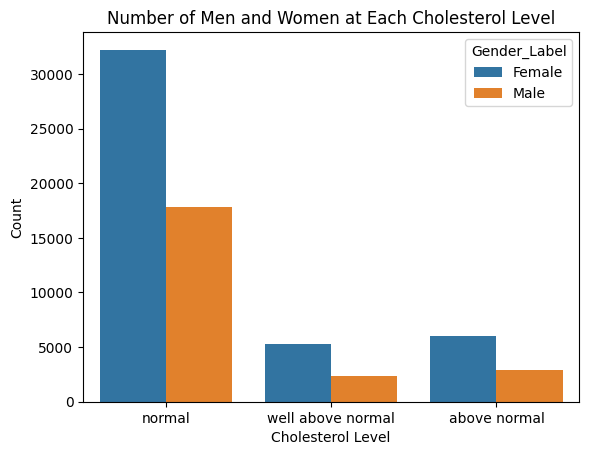

In [25]:
df['Gender_Label'] = pd.Categorical(df['Gender_Label'])
cholesterol_labels = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
df['cholesterol_label'] = df['cholesterol'].map(cholesterol_labels)
sns.countplot(x='cholesterol_label', hue='Gender_Label', data=df)
plt.title('Number of Men and Women at Each Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()


c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


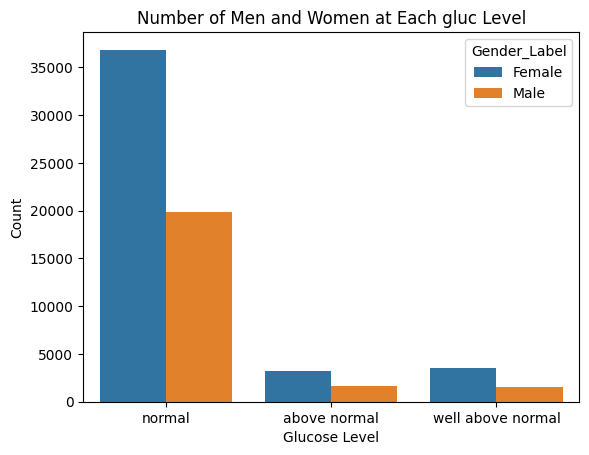

In [26]:
df['Gender_Label'] = pd.Categorical(df['Gender_Label'])
gluc_labels = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
df['gluc_label'] = df['gluc'].map(gluc_labels)
sns.countplot(x='gluc_label', hue='Gender_Label', data=df)
plt.title('Number of Men and Women at Each gluc Level')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()


On peut voir que pour le niveau de glucose et de cholesterol ce sont majoritairement des femmes qui ont un niveau au dessus de la normalité mais cela peut être expliqué un plus grand nombre de femmes dans le dataset. Si on compare à vu d'oeil les chiffres relativement à la population dans le dataset, c'est à dire le nombre de femmes et d'hommes, on voit que c'est à peut prêt la même chose pour les 2 genres.

#### Regression logistique avec Sklearn

In [27]:
X = df[['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.70      0.75      0.73      8441
           1       0.73      0.67      0.70      8230

    accuracy                           0.71     16671
   macro avg       0.71      0.71      0.71     16671
weighted avg       0.71      0.71      0.71     16671



In [35]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8441
           1       0.75      0.66      0.70      8230

    accuracy                           0.72     16671
   macro avg       0.73      0.72      0.72     16671
weighted avg       0.73      0.72      0.72     16671



On test tout d'abord le modèle en utilisant uniquement le nombre d'itérations.

In [37]:
logistic_model = LogisticRegression(max_iter=10000, C=0.5)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8441
           1       0.75      0.66      0.70      8230

    accuracy                           0.72     16671
   macro avg       0.73      0.72      0.72     16671
weighted avg       0.73      0.72      0.72     16671



Ici nous ajoutons C qui correspond à la régularisation du modèle. Avec une valeur de 0,5 nous utilisons une régularisation moyenne.

In [31]:
logistic_model = LogisticRegression(max_iter=5000, C=0.5, penalty='l2')
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8441
           1       0.75      0.66      0.70      8230

    accuracy                           0.72     16671
   macro avg       0.73      0.72      0.72     16671
weighted avg       0.73      0.72      0.72     16671

[[6657 1784]
 [2815 5415]]


Ici nous ajoutons la 'penalty' l2 qui est généralement le choix par défaut pour les regression logistiques. Cet hyperparamètre permet d'avoir un modèle plus stable et robuste.

In [41]:
param_distributions = {
    'max_iter': [5000, 6000, 7000, 8000, 9000, 10000],
    'C': uniform(loc=0, scale=1),
    'penalty': ['l2']
}

randomized_search = RandomizedSearchCV(LogisticRegression(), param_distributions, n_iter=10, cv=5)

randomized_search.fit(X_train, y_train)

best_params = randomized_search.best_params_

logistic_model = LogisticRegression(**best_params)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8441
           1       0.75      0.66      0.70      8230

    accuracy                           0.72     16671
   macro avg       0.73      0.72      0.72     16671
weighted avg       0.73      0.72      0.72     16671

[[6657 1784]
 [2813 5417]]


Ici nous ajoutons un système de distribution de paramètre qui permet de tester le modèle avec plusieurs paramètres différents. Nous ajoutons également une 'cross validation'. Cela permet de tester le modèle afin d'identifier les meilleurs paramètres à utilsier. 

Cependant nous remarquons qu'il y a pas de différence avec les précédents test qui utilisaient moins d'hyper paramètres.

#### Regression logistique avec ma classe

cf fichier 'main.py'

#### Evaluation des résultats

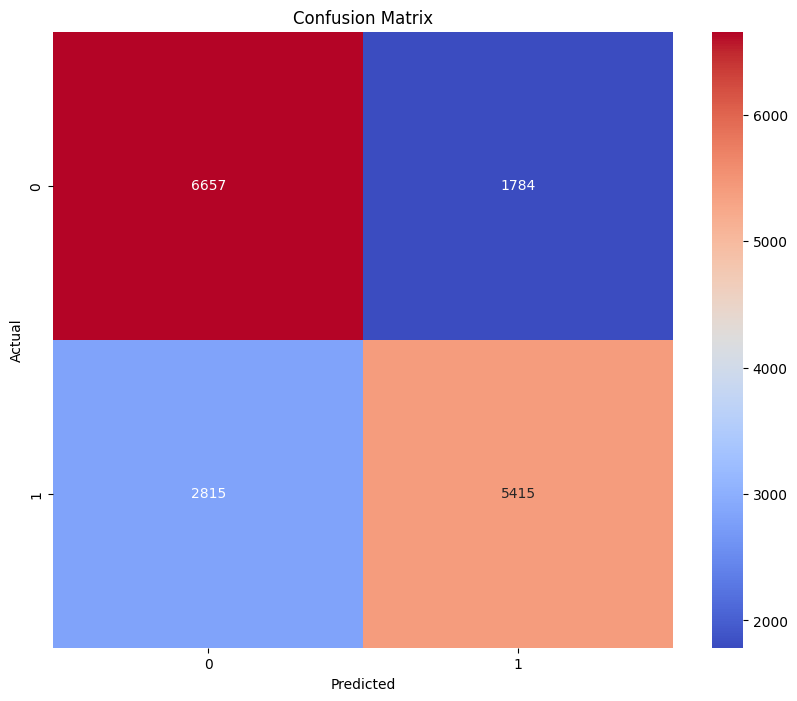

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


In [47]:
# recall
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(f'Recall: {recall:.2f}')

Recall: 0.66


In [52]:
# f1
f1 = 2 * (accuracy * recall) / (accuracy + recall)
print(f'F1: {f1:.2f}')


F1: 0.69


*Ces interprétations de résultats sont basés sur un précédent test du modèle. Les résultats peuvent donc varier légèrement.*

On peut observer au travers de ces différentes métriques que l'algorithme fonctionne raisonnablement bien. Nous avons en effet une accuracy de 73%, un recall de 66% et un score F1 de 74%. Le modèle prédit donc 73% des valeurs correctement.  

En observant le rapport de classification on remarque que pour les classes 0 il y a environ 71% d'entres elles qui sont prédites correctement. Pour la classe 1 nous sommes à 75%. 

En ce qui concerne la matrice de confusion on peut observer que pour les classes 0 il y a 6642 true negative et 1799 false positive. Pour la classe 1 nous sommes à 2770 de false negatives et 5460 de true positives. Le modèle prédit donc beaucoup plus de valeurs correctement que non. 

Etant donnée que le score f1 nous permet d'évaluer notre modèle en prenant en compte à la fois la précision ainsi que le recall il s'agit peut etre de la meilleure manière, ou du moins la plus simple pour évaluer notre modèle. Le rapport de classification est également une bonne manière d'analyser la performance de notre algorithme car il nous permet d'avoir une vue d'ensemble sur toutes nos métriques.

#### Prédiction pour Arthur

In [56]:
# Spéficiation des données du nouveau patient
new_data = pd.DataFrame({
    'age_years': [53],
    'height': [175],
    'weight': [85],
    'ap_hi': [120],
    'ap_lo': [90],
    'cholesterol': [2],
    'gluc': [1],
    'smoke': [1],
    'alco': [0],
    'active': [1]
})

# Prédiction en utilisant les nouvelles données
prediction = logistic_model.predict(new_data)

if prediction[0] == 1:
    print("Le sujet est à risque cardiovasculaire.")
else:
    print("Le sujet n'est pas à risque cardiovasculaire.")

Le sujet n'est pas à risque cardiovasculaire.
